# MACHINE LEARNING - CSE4020

# IMPORTANT HIGHLIGHTS IN PRIVACY POLICY USING NATURAL LANGUAGE PROCESSING (NLP)

# J-COMPONENT REVIEW-3

# V Raghav Anand - 19BCE1415

# Anthra Devarajan - 19BCE1681

# S Sabhari Girish - 19BCE1759

# Faculty: Prof. Abdul Quadir MD

## Importing libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
dataset=pd.read_csv("privacy_policy_buy_sell.csv")
dataset

,S. No,Website name,Company website,Privacy policy link
0,1,Limeroad,https://www.limeroad.com/,https://www.limeroad.com/privacypolicy
1,2,Groupon,https://people.groupon.com/india/,https://www.groupon.com/legal/privacypolicy
2,3,CraftGhar,https://craftghar.com/,https://craftghar.com/privacy-policy.html
3,4,Saree,https://www.saree.com/,https://www.saree.com/privacy-policy
4,5,Rediff Shopping,http://shopping.rediff.com/,http://imshopping.rediff.com/shopping/shp_Priv...
5,6,Eleb2b,https://www.eleb2b.com/,https://www.eleb2b.com/Privacy-Policy
6,7,eBay,https://in.ebay.com/,https://www.ebay.com/help/policies/member-beha...
7,8,OLX,https://www.olx.in,https://help.olx.in/hc/en-us/articles/36000208...
8,9,gocoop,https://gocoop.com/,https://gocoop.com/policies/privacy-policy


In [3]:
import re
import urllib

## Functions to perform extraction of data from privacy policy link

## Web scraping makes sure that the entire website page containing the privacy policy is scanned from top to bottom

### extract_content() function is used to open the URL link and decode the UTF-8 encoding

In [4]:
def extract_content(link):
    f = urllib.request.urlopen(link)
    myfile = f.read()
    file=myfile.decode('UTF-8')
    return file

### clean_html_content() function is used to remove all the special characters using REGEX in Python

In [5]:
def clean_html_content(raw_html):
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(CLEANR, '', raw_html)
    return cleantext

### extract_words() function is used to extract all the words from the scraped data using REGEX in Python

In [6]:
def extract_words(clean_policy):
    words_pattern = '[a-z]+'
    word_list=re.findall(words_pattern, clean_policy, flags=re.IGNORECASE)
    return word_list

### text_cleaner() function is used to remove all the short words and stop words present in the text

In [7]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

### place_delimiters() is used to split the words using comma as the delimiter so that words can be extracted and put in lists

In [8]:
def place_delimiters(file):
    comma_separated_file=file.replace(" ", ",")
    return comma_separated_file    

# IN THE UPCOMING CELLS, THE FIRST 5000 INDEX OF THE SCRAPED DATA IS SHOWN AS SAMPLE OUTPUT IN ORDER TO AVOID LARGE OUTPUTS PRINTED IN THE HTML FILE WHICH CAN BE DIFFICULT TO SCROLL, HOWEVER, IT IS IMPORTANT TO NOTE THAT THE SCRAPED DATA CONTAINS THE ENTIRE WEBSITE'S PAGE AND IS VERY LARGE 

## Taking the first privacy policy website link and performing preprocessing

In [9]:
file=extract_content("https://www.groupon.com/legal/privacypolicy")
print(file[:5000])


<!DOCTYPE html>
<!-- content-pages: gig_application_layout@7.0.119 126d3af -->
<html lang="en">
<head data-app="content-pages" data-country="US" data-lang="en" data-locale="en_US" data-header="default" data-brand="groupon" data-gdpr="false" data-domain=".groupon.com" data-categoryid=""><meta charSet="utf-8"/><title>GROUPON, INC. PRIVACY STATEMENT</title><meta http-equiv="x-dns-prefetch-control" content="on"/><link rel="preconnect" href="https://www2.grouponcdn.com" crossorigin=""/><link rel="preconnect" href="https://www1.grouponcdn.com" crossorigin=""/><link rel="preconnect" href="https://img.grouponcdn.com" crossorigin=""/><link rel="preload" href="https://www2.grouponcdn.com/layout/assets/Groupon-5e0a12d84d.woff2" crossorigin="" type="font/woff2" as="font"/><link rel="preload" href="https://www2.grouponcdn.com/layout/assets/desktop-grpn-v7.0-9d3dce3f88.css" as="style"/><link rel="stylesheet" href="https://www2.grouponcdn.com/layout/assets/desktop-grpn-v7.0-9d3dce3f88.css"/><link re

## Calling the place_delimiters() function

In [10]:
comma_separated_file=place_delimiters(file)
print(comma_separated_file[:5000])


<!DOCTYPE,html>
<!--,content-pages:,gig_application_layout@7.0.119,126d3af,-->
<html,lang="en">
<head,data-app="content-pages",data-country="US",data-lang="en",data-locale="en_US",data-header="default",data-brand="groupon",data-gdpr="false",data-domain=".groupon.com",data-categoryid=""><meta,charSet="utf-8"/><title>GROUPON,,INC.,PRIVACY,STATEMENT</title><meta,http-equiv="x-dns-prefetch-control",content="on"/><link,rel="preconnect",href="https://www2.grouponcdn.com",crossorigin=""/><link,rel="preconnect",href="https://www1.grouponcdn.com",crossorigin=""/><link,rel="preconnect",href="https://img.grouponcdn.com",crossorigin=""/><link,rel="preload",href="https://www2.grouponcdn.com/layout/assets/Groupon-5e0a12d84d.woff2",crossorigin="",type="font/woff2",as="font"/><link,rel="preload",href="https://www2.grouponcdn.com/layout/assets/desktop-grpn-v7.0-9d3dce3f88.css",as="style"/><link,rel="stylesheet",href="https://www2.grouponcdn.com/layout/assets/desktop-grpn-v7.0-9d3dce3f88.css"/><link,re

## Define a dictionary named contraction_mapping whose words when found in the privacy policy text, are removed

In [11]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

clean_policy=text_cleaner(comma_separated_file)
print(clean_policy)

html groupon inc privacy statement get groupon appscan download groupon mobile app ios android text link insteadrecently viewedmy wishlistsellhelpsign upgroupon logocategoriesyour shopping cart empty time fill bad boy great products like gadgets electronics housewares gifts great offerings groupon goods new notificationssign get personalized notifications deals cash back special offers sign inno account yet sign upsign inmy stuffmy grouponsbuy againmy groupon dealsmy wishlistaccountredeem gift cardnot member sign upsign access grouponsemailpasswordshowremember meforgot password sign inor sign withfacebookgooglegroupon inc privacy statementeffective date august privacy notice explains groupon inc affiliates subsidiaries use information applies use websites platforms including mobile applications touch technologies electronic services social networking sites interactive features online services described online activities control terms govern use service please review service terms use u

## List of words present in the privacy policy page link is extracted

In [12]:
word_list_1=extract_words(clean_policy)
print(word_list_1)

['html', 'groupon', 'inc', 'privacy', 'statement', 'get', 'groupon', 'appscan', 'download', 'groupon', 'mobile', 'app', 'ios', 'android', 'text', 'link', 'insteadrecently', 'viewedmy', 'wishlistsellhelpsign', 'upgroupon', 'logocategoriesyour', 'shopping', 'cart', 'empty', 'time', 'fill', 'bad', 'boy', 'great', 'products', 'like', 'gadgets', 'electronics', 'housewares', 'gifts', 'great', 'offerings', 'groupon', 'goods', 'new', 'notificationssign', 'get', 'personalized', 'notifications', 'deals', 'cash', 'back', 'special', 'offers', 'sign', 'inno', 'account', 'yet', 'sign', 'upsign', 'inmy', 'stuffmy', 'grouponsbuy', 'againmy', 'groupon', 'dealsmy', 'wishlistaccountredeem', 'gift', 'cardnot', 'member', 'sign', 'upsign', 'access', 'grouponsemailpasswordshowremember', 'meforgot', 'password', 'sign', 'inor', 'sign', 'withfacebookgooglegroupon', 'inc', 'privacy', 'statementeffective', 'date', 'august', 'privacy', 'notice', 'explains', 'groupon', 'inc', 'affiliates', 'subsidiaries', 'use', 'i

## Taking the next privacy policy website link and doing the same procedure

In [13]:
file=extract_content("http://imshopping.rediff.com/shopping/shp_PrivacyPolicy.htm")
print(file[:5000])

<HTML>
<HEAD>
<META HTTP-EQUIV=expires CONTENT=60>
<META NAME=DESCRIPTION CONTENT="Rediff Shopping: India's No. 1 online shopping and gifting store. A part of Rediff.com India's largest news and entertainment service online.">
<META NAME=KEYWORDS CONTENT="rediff.com, shopping, shop, India, US, gift, gifting, marketplace, books, music, festivals, Indian, occasions, brands, online, site, internet discounts, offers, home, send, products, items, exclusive, services, range">
<SCRIPT LANGUAGE=JavaScript src=/shopping/cart.js>
</SCRIPT>
<style type="text/css">
.sb1 {FONT-SIZE: 11px; COLOR: #ffffff; FONT-FAMILY: arial; TEXT-DECORATION: none}
.sb2 {FONT-SIZE: 12px; FONT-FAMILY: arial; TEXT-DECORATION: none}
.sb3 {FONT-SIZE: 16px; FONT-FAMILY: arial; TEXT-DECORATION: none}
.sb11 {FONT-FAMILY: arial; FONT-SIZE: 11px;}
A.tab3 {FONT-SIZE: 11px; COLOR: #ffffff; FONT-FAMILY: arial; TEXT-DECORATION: none}
</style>
<title>rediff.com: Shopping Terms and Conditions</title>
</HEAD>
<BODY BGCOLOR="#FFFFFF"

In [14]:
comma_separated_file=place_delimiters(file)
print(comma_separated_file[:5000])

<HTML>
<HEAD>
<META,HTTP-EQUIV=expires,CONTENT=60>
<META,NAME=DESCRIPTION,CONTENT="Rediff,Shopping:,India's,No.,1,online,shopping,and,gifting,store.,A,part,of,Rediff.com,India's,largest,news,and,entertainment,service,online.">
<META,NAME=KEYWORDS,CONTENT="rediff.com,,shopping,,shop,,India,,US,,gift,,gifting,,marketplace,,books,,music,,festivals,,Indian,,occasions,,brands,,online,,site,,internet,discounts,,offers,,home,,send,,products,,items,,exclusive,,services,,range">
<SCRIPT,LANGUAGE=JavaScript,src=/shopping/cart.js>
</SCRIPT>
<style,type="text/css">
.sb1,{FONT-SIZE:,11px;,COLOR:,#ffffff;,FONT-FAMILY:,arial;,TEXT-DECORATION:,none}
.sb2,{FONT-SIZE:,12px;,FONT-FAMILY:,arial;,TEXT-DECORATION:,none}
.sb3,{FONT-SIZE:,16px;,FONT-FAMILY:,arial;,TEXT-DECORATION:,none}
.sb11,{FONT-FAMILY:,arial;,FONT-SIZE:,11px;}
A.tab3,{FONT-SIZE:,11px;,COLOR:,#ffffff;,FONT-FAMILY:,arial;,TEXT-DECORATION:,none}
</style>
<title>rediff.com:,Shopping,Terms,and,Conditions</title>
</HEAD>
<BODY,BGCOLOR="#FFFFFF"

In [15]:
clean_policy=text_cleaner(comma_separated_file)
print(clean_policy)

rediff com shopping terms conditions privacy policy rediff com india limited subsidiaries affiliates respects privacy privacy policy provides succinctly manner data collected used rediff com advised please read privacy policy carefully accessing services provided rediff com agree collection use data rediff com manner provided privacy policy want feel comfortable using web sites feel secure submitting information contact questions concerns privacy site know using sites consenting collection certain data information may collected automatically receive collect certain anonymous information standard usage logs web server including computer identification information obtained cookies sent browser web server cookie stored hard drive address assigned computer use domain server access service type computer using type web browser using may collect following personally identifiable information name including first last name alternate email address mobile phone number contact details zip postal c

## Words extracted and stored in another list

In [16]:
word_list_2=extract_words(clean_policy)
print(word_list_2)

['rediff', 'com', 'shopping', 'terms', 'conditions', 'privacy', 'policy', 'rediff', 'com', 'india', 'limited', 'subsidiaries', 'affiliates', 'respects', 'privacy', 'privacy', 'policy', 'provides', 'succinctly', 'manner', 'data', 'collected', 'used', 'rediff', 'com', 'advised', 'please', 'read', 'privacy', 'policy', 'carefully', 'accessing', 'services', 'provided', 'rediff', 'com', 'agree', 'collection', 'use', 'data', 'rediff', 'com', 'manner', 'provided', 'privacy', 'policy', 'want', 'feel', 'comfortable', 'using', 'web', 'sites', 'feel', 'secure', 'submitting', 'information', 'contact', 'questions', 'concerns', 'privacy', 'site', 'know', 'using', 'sites', 'consenting', 'collection', 'certain', 'data', 'information', 'may', 'collected', 'automatically', 'receive', 'collect', 'certain', 'anonymous', 'information', 'standard', 'usage', 'logs', 'web', 'server', 'including', 'computer', 'identification', 'information', 'obtained', 'cookies', 'sent', 'browser', 'web', 'server', 'cookie', '

## Third privacy policy page link

In [17]:
file=extract_content("https://www.eleb2b.com/Privacy-Policy")
print(file[:5000])

<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1.0" />
        <title>eleB2B.com: India’s Online B2B Directory of Electronics Suppliers, Manufacturers, Distributors, Service Providers, etc.</title>
        <meta name="description" content="Leading B2B Directory of Electronics Manufacturers, Distributors, Resellers, OEMs, ESDMs, Design Houses, Service Providers, Trade Associations, System Integrators in India." />
        <meta property="og:title" content="eleB2B.com: India’s Online B2B Directory of Electronics Suppliers, Manufacturers, Distributors, Service Providers, etc." />
        <meta property="og:description" content="Leading B2B Directory of Electronics Manufacturers, Distributors, Resellers, OEMs, ESDMs, Design Houses, Service Providers, Trade Associations, System Integrators in India." />
    <link rel="canonical" href="https

In [18]:
comma_separated_file=place_delimiters(file)
print(comma_separated_file[:5000])

<!DOCTYPE,html>
<html>
<head>
,,,,<meta,charset="utf-8">
,,,,<meta,http-equiv="Content-Type",content="text/html;,charset=utf-8",/>
,,,,<meta,name="viewport",content="width=device-width,,initial-scale=1.0",/>
,,,,,,,,<title>eleB2B.com:,India’s,Online,B2B,Directory,of,Electronics,Suppliers,,Manufacturers,,Distributors,,Service,Providers,,etc.</title>
,,,,,,,,<meta,name="description",content="Leading,B2B,Directory,of,Electronics,Manufacturers,,Distributors,,Resellers,,OEMs,,ESDMs,,Design,Houses,,Service,Providers,,Trade,Associations,,System,Integrators,in,India.",/>
,,,,,,,,<meta,property="og:title",content="eleB2B.com:,India’s,Online,B2B,Directory,of,Electronics,Suppliers,,Manufacturers,,Distributors,,Service,Providers,,etc.",/>
,,,,,,,,<meta,property="og:description",content="Leading,B2B,Directory,of,Electronics,Manufacturers,,Distributors,,Resellers,,OEMs,,ESDMs,,Design,Houses,,Service,Providers,,Trade,Associations,,System,Integrators,in,India.",/>
,,,,<link,rel="canonical",href="https

In [19]:
clean_policy=text_cleaner(comma_separated_file)
print(clean_policy)

html eleb com india online directory electronics suppliers manufacturers distributors service providers etc home biz channel partner finder invite channel partner register buyer register supplier launchpad contact login home privacy policy eleb com privacy policy eleb com committed safeguarding users privacy request users read privacy policy understand personal business information handled charge single penny buyers suppliers exchange services privacy policy applicable entire network suppliers manufacturers etc listed using eleb com using site consent terms online privacy policy user information collect collect information buyers suppliers register gain access services requested provide personal business details registration ask buyers suppliers name email address business information personal details use personal business information successful registration users longer anonymous eleb com efy group website admins deemed user given right publish relevant personal business details follo

## Extracted words

In [20]:
word_list_3=extract_words(clean_policy)
print(word_list_3)

['html', 'eleb', 'com', 'india', 'online', 'directory', 'electronics', 'suppliers', 'manufacturers', 'distributors', 'service', 'providers', 'etc', 'home', 'biz', 'channel', 'partner', 'finder', 'invite', 'channel', 'partner', 'register', 'buyer', 'register', 'supplier', 'launchpad', 'contact', 'login', 'home', 'privacy', 'policy', 'eleb', 'com', 'privacy', 'policy', 'eleb', 'com', 'committed', 'safeguarding', 'users', 'privacy', 'request', 'users', 'read', 'privacy', 'policy', 'understand', 'personal', 'business', 'information', 'handled', 'charge', 'single', 'penny', 'buyers', 'suppliers', 'exchange', 'services', 'privacy', 'policy', 'applicable', 'entire', 'network', 'suppliers', 'manufacturers', 'etc', 'listed', 'using', 'eleb', 'com', 'using', 'site', 'consent', 'terms', 'online', 'privacy', 'policy', 'user', 'information', 'collect', 'collect', 'information', 'buyers', 'suppliers', 'register', 'gain', 'access', 'services', 'requested', 'provide', 'personal', 'business', 'details'

## Fourth privacy policy page link

In [21]:
file=extract_content("https://www.ebay.com/help/policies/member-behaviour-policies/user-privacy-notice-privacy-policy?id=4260")
print(file[:5000])

<!DOCTYPE html><html lang=en><head><meta http-equiv=X-UA-Compatible content=IE=Edge><link rel="dns-prefetch" href="//ir.ebaystatic.com"><link rel="dns-prefetch" href="//secureir.ebaystatic.com"><link rel="dns-prefetch" href="//i.ebayimg.com"><link rel="dns-prefetch" href="//rover.ebay.com"><script>$ssgST=new Date().getTime();</script><meta charset=utf-8><meta name=google-site-verification content=RDpd-WPXK6QX0AeQPo4hCtBF-2nKyj3zjzY-H7GgRs8><meta name=viewport content="width=device-width, initial-scale=1"><meta http-equiv=content-language><meta name=format-detection content=telephone=no><meta property=og:type content=article><meta property=og:title content="User Privacy Notice"><meta property=og:description content="In our User Privacy Notice we have compiled all essential information about our handling of your personal data and your corresponding rights for you.
&nbsp;

This User Privacy Notice is effective from December 23, 2021. View the previous User Privacy Notice.
"><meta property

In [22]:
comma_separated_file=place_delimiters(file)
print(comma_separated_file[:5000])

<!DOCTYPE,html><html,lang=en><head><meta,http-equiv=X-UA-Compatible,content=IE=Edge><link,rel="dns-prefetch",href="//ir.ebaystatic.com"><link,rel="dns-prefetch",href="//secureir.ebaystatic.com"><link,rel="dns-prefetch",href="//i.ebayimg.com"><link,rel="dns-prefetch",href="//rover.ebay.com"><script>$ssgST=new,Date().getTime();</script><meta,charset=utf-8><meta,name=google-site-verification,content=RDpd-WPXK6QX0AeQPo4hCtBF-2nKyj3zjzY-H7GgRs8><meta,name=viewport,content="width=device-width,,initial-scale=1"><meta,http-equiv=content-language><meta,name=format-detection,content=telephone=no><meta,property=og:type,content=article><meta,property=og:title,content="User,Privacy,Notice"><meta,property=og:description,content="In,our,User,Privacy,Notice,we,have,compiled,all,essential,information,about,our,handling,of,your,personal,data,and,your,corresponding,rights,for,you.
&nbsp;

This,User,Privacy,Notice,is,effective,from,December,23,,2021.,View,the,previous,User,Privacy,Notice.
"><meta,property

In [23]:
clean_policy=text_cleaner(comma_separated_file)
print(clean_policy[:5000])

html user privacy notice ebay bce skip main contentcustomer servicehi daily deals help contactship toloading error try againok sellwatchlistexpand watch listloading sign see user information ebayexpand ebay summary recently viewed bids offers watchlist purchase history buy selling saved searches saved sellers messagesnotification expand cartloading something went wrong view cart details page navigationhomecustomer serviceuser privacy noticeenter key words want ask helpa dialog open type search terms min articleuser privacy noticeenter search term display live search results use tab key navigate results scope updates user privacy notice controller data protection officer contact personal data collect process purposes legal basis data processing categories recipients international data transfers storage duration erasure rights data subject cookies similar technologies data security important information regarding data protection regional state privacy disclosuresprevious user privacy not

## Extracted words

In [24]:
word_list_4=extract_words(clean_policy)
print(word_list_4)

['html', 'user', 'privacy', 'notice', 'ebay', 'bce', 'skip', 'main', 'contentcustomer', 'servicehi', 'daily', 'deals', 'help', 'contactship', 'toloading', 'error', 'try', 'againok', 'sellwatchlistexpand', 'watch', 'listloading', 'sign', 'see', 'user', 'information', 'ebayexpand', 'ebay', 'summary', 'recently', 'viewed', 'bids', 'offers', 'watchlist', 'purchase', 'history', 'buy', 'selling', 'saved', 'searches', 'saved', 'sellers', 'messagesnotification', 'expand', 'cartloading', 'something', 'went', 'wrong', 'view', 'cart', 'details', 'page', 'navigationhomecustomer', 'serviceuser', 'privacy', 'noticeenter', 'key', 'words', 'want', 'ask', 'helpa', 'dialog', 'open', 'type', 'search', 'terms', 'min', 'articleuser', 'privacy', 'noticeenter', 'search', 'term', 'display', 'live', 'search', 'results', 'use', 'tab', 'key', 'navigate', 'results', 'scope', 'updates', 'user', 'privacy', 'notice', 'controller', 'data', 'protection', 'officer', 'contact', 'personal', 'data', 'collect', 'process', 

### Rest of the privacy policy links can be used for testing later

## Extracting the common words from the list of words obtained above

In [25]:
common_word_set=set(word_list_1) & set(word_list_2) & set(word_list_3) & set(word_list_4)

In [26]:
common_word_list=list(common_word_set)

In [27]:
common_word_list

['data',
 'right',
 'policy',
 'product',
 'account',
 'register',
 'may',
 'process',
 'contact',
 'disclose',
 'rights',
 'privacy',
 'access',
 'site',
 'time',
 'browser',
 'want',
 'com',
 'purposes',
 'websites',
 'terms',
 'request',
 'services',
 'requests',
 'cookie',
 'also',
 'online',
 'orders',
 'changes',
 'using',
 'used',
 'permission',
 'cookies',
 'name',
 'regarding',
 'change',
 'email',
 'use',
 'special',
 'provide',
 'take',
 'requested',
 'parties',
 'collect',
 'following',
 'service',
 'send',
 'part',
 'address',
 'settings',
 'without',
 'shared',
 'share',
 'personal',
 'web',
 'products',
 'third',
 'sell',
 'promotion',
 'information',
 'reserved']

In [28]:
len(common_word_list)

61

## Testing on a privacy policy text

In [29]:
policy_test="eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users are no longer anonymous to the eleB2B.com and EFY Group website admins, and it is deemed that the user has given us the right to publish the relevant personal and business details for the following purposes:To personalise your experienceTo improve our websiteTo share with sponsorsTo administer a contest, promotion, survey, or conduct any other such activity on the siteTo send out periodic emails.The email address you provide may be used to send you information, respond to inquiries, have an interactive communication, address other requests or personalise your experience on our website. Your business information is used when compiling listings or when featuring product offerings across our network, thus fetching the maximum business opportunities for the user.We also collect usage statistics (page views, unique visitors, browser software, screen resolutions, etc.) through third party tools/websites for analysis. This data helps us provide you with an improved user experience and services.Sharing of Information:As per our principles, eleB2B.com and EFY Group websites will not disclose or share any of your personal as well as business information without your permission, or under special circumstances as permitted in the terms of this policy (Privacy Policy Agreement).Distribution of Information:eleB2B.com; send its users emails regarding its products and services. It may also use your information to create any match- making tools to bring buyers together with interested sellers.Promotional use:Promotions that are being run may be sponsored by eleB2B.com only or EFY Group websites. You can decide not to participate in the promotions if you don't want your data to be shared. For the record, right now, eleB2B.com is not running any promotional campaign.Updating information:As a buyer or supplier, you may edit your account information and profile by logging into our website and/or by sending a request to the admin within the panel. The requested changes will take time to be displayed on the website because of the cross-verification process.At the same time, a registered user account can be deleted or deactivated, but doing so will only result in the user not being able to access the members-only area of the website. The rest of the information about that particular user will remain in our records.Cookie policyRight now, we are using cookies for usability purposes only. You can choose to have your computer warn you each time a cookie is being sent, or you can choose to turn off all cookies via your browser settings. Also, if you turn your cookies off, some of our services may not function properly.You can still place orders by contacting customer service +91-11-4059-6605 or can complain at support@eleb2b.com.Protection of Information:We do not sell third parties any data in bulk, which can be misused for telemarketing, bulk mailing or any other wrong purposes. Also, eleB2B does not sell any user’s’ personal information or business information until and unless it is permitted to do so by the user, as per the terms of this policy (Privacy Policy Agreement).Changes in the Privacy Policy.eleB2B.com reserves the right to change its user policies from time to time, so we suggest that you, as a buyer or seller, check the terms of the policy periodically."
policy_test

"eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, u

## Storing the sentences in a list by using "." as the delimiter and splitting

In [30]:
policy_test_sentences=policy_test.split(".")
policy_test_sentences

['eleB2B',
 "com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy",
 " We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled",
 ' As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services',
 ' This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B',
 'com',
 'By using our site, you consent to the terms of our online Privacy Policy',
 'What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details',
 ' During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details',
 'What do we use your personal/business informat

In [31]:
len(policy_test_sentences)

41

## Code to print the sentences which contain words from the common word list (either as a subset, or as a whole)

In [32]:
summary=[]
for i in range(len(policy_test_sentences)):
    for j in common_word_list:
        if j in policy_test_sentences[i]:
            summary.append(policy_test_sentences[i])
            break

In [33]:
summary

["com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy",
 " We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled",
 ' As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services',
 ' This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B',
 'com',
 'By using our site, you consent to the terms of our online Privacy Policy',
 'What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details',
 ' During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details',
 'What do we use your personal/business information for?On 

In [34]:
len(summary)

35

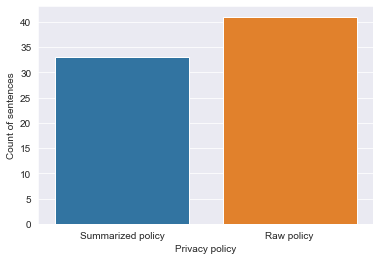

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.barplot(x=["Summarized policy","Raw policy"],y=[33,41]).set(xlabel='Privacy policy', ylabel='Count of sentences')
plt.show()

## We can infer that there is a 19.5% decrease in the number of sentences after using common words to extract sentences

## Testing using another privacy policy text

In [163]:
test_2="Rediff.com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy. This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com. You are advised to please read the Privacy Policy carefully. By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you access our service the type of computer you're using, the type of web browser you're using.We may collect the following personally identifiable information about you:name including first and last name alternate email address mobile phone number and contact details ZIP/Postal code demographic profile (like your age, gender, occupation, education, address and durables owned);preferences and interests (such as news, sports, travel and so on);financial information (like account or credit card numbers); andopinions of features on our websites.We may also collect the following information:about the pages you visit/access the links you click on our site the number of times you access the pageYou can terminate your account at any time. However, your information may remain stored in archive on our servers even after the deletion or the termination of your account.WHO COLLECTS THE INFORMATION?We will collect anonymous traffic information from you when you visit our site.We will collect personally identifiable information about you only as part of a voluntary registration process, on-line survey, or contest or any combination thereof.Our advertisers may collect anonymous traffic information from their own assigned cookies to your browser.The Site contains links to other Web sites. We are not responsible for the privacy practices of such Web sites which we do not own, manage or control.We make chat rooms, forums, instant messenger and message boards and other services available to you. Please understand that any information that is disclosed in these areas becomes public information. We have no control over its use and you should exercise caution when disclosing your personal information to anyone.HOW IS THE INFORMATION USED?We use your personal information to:help us provide personalized featurestailor our sites to your interest to get in touch with you when necessary to provide the services requested by you to preserve social history as governed by existing law or policy.We use contact information internally to: direct our efforts for product improvement contact you as a survey respondent notify you if you win any contest; and send you promotional materials from our contest sponsors or advertisers Generally, we use anonymous traffic information to: remind us of who you are in order to deliver to you a better and more personalized service from both an advertising and an editorial perspective; recognize your access privileges to our Web sites track your entries in some of our promotions, sweepstakes and contests to indicate a player's progress through the promotion and to track entries, submissions, and status in prize drawings make sure that you don't see the same ad repeatedly help diagnose problems with our server administer our Web sites track your session so that we can understand better how people use our sites.WITH WHOM WILL YOUR INFORMATION BE SHARED?We will not use your financial information for any purpose other than to complete a transaction with you.We do not rent, sell or share your personal information and we will not disclose any of your personally identifiable information to third parties unless:we have your permissionto provide products or services you've requested to help investigate, prevent or take action regarding unlawful and illegal activities, suspected fraud, potential threat to the safety or security of any person, violations of Rediff.com's terms of use or to defend against legal claims;special circumstances such as compliance with subpoenas, court orders, requests/order from legal authorities or law enforcement agencies requiring such disclosure.We share your information with advertisers on an aggregate basis only.WHAT CHOICES ARE AVAILABLE TO YOU REGARDING COLLECTION, USE AND DISTRIBUTION OF YOUR INFORMATION?Supplying personally identifiable information is entirely voluntary. You are not required to register with us in order to use our sites. However, we offer some services only to visitors who do register.You may change your interests at any time and may opt-in or opt-out of any marketing / promotional / newsletters mailings. Rediff.com reserves the right to send you certain service-related communication, considered to be a part of your rediff account without offering you the facility to opt-out. You may update your information and change your account settings at any time.Upon request, we will remove/block your personally identifiable information from our database, thereby canceling your registration. See Contact information below. However, your information may remain stored in archive on our servers even after the deletion or the termination of your account.If we plan to use your personally identifiable information for any commercial purposes, we will notify you at the time we collect that information and allow you to opt-out of having your information used for those purposes.You can accept or decline the cookies. All sites that are customizable require that you accept cookies. You also must accept cookies to register as someone for access to some of our services. For information on how to set your browser to alert you to cookies, or to reject cookies, go to http://www.cookiecentral.com/faq/.WHAT SECURITY PROCEDURES ARE IN PLACE TO PROTECT INFORMATION FROM LOSS, MISUSE OR ALTERATION?To protect against the loss, misuse and alteration of the information under our control, we have in place appropriate physical, electronic and managerial procedures. For example, our servers are accessible only to authorized personnel and that your information is shared with respective personnel on need to know basis to complete the transaction and to provide the services requested by you.Although we will endeavor to safeguard the confidentiality of your personally identifiable information, transmissions made by means of the Internet cannot be made absolutely secure. By using this site, you agree that we will have no liability for disclosure of your information due to errors in transmission or unauthorized acts of third parties.HOW CAN YOU CORRECT INACCURACIES IN THE INFORMATION?To correct or update any information you have provided, our sites allow you to do it online. In the event of loss of access details you can use any of the following options:Send an e-mail to shopsupport@rediff.co.in.Call the following telephone number: +91 (22) 61820000.POLICY UPDATES.We reserve the right to change or update this policy at any time by placing a prominent notice on our site. Such changes shall be effective immediately upon posting to this site.You are can offer your views, suggestions, if any, by submitting the filled in feedback form online."
test_2

"Rediff.com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy. This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com. You are advised to please read the Privacy Policy carefully. By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to

In [164]:
test_2=test_2.split(".")
test_2

['Rediff',
 "com India Limited and its subsidiaries and affiliates ('Rediff",
 "com') respects your privacy",
 ' This Privacy Policy provides succinctly the manner your data is collected and used by Rediff',
 'com',
 ' You are advised to please read the Privacy Policy carefully',
 ' By accessing the services provided by Rediff',
 'com you agree to the collection and use of your data by Rediff',
 'com in the manner provided in this Privacy Policy',
 'We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data',
 "WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on y

In [165]:
len(test_2)

59

In [166]:
summary=[]
for i in range(len(test_2)):
    for j in common_word_list:
        if j in test_2[i]:
            summary.append(test_2[i])
            break

In [167]:
summary

["com India Limited and its subsidiaries and affiliates ('Rediff",
 "com') respects your privacy",
 ' This Privacy Policy provides succinctly the manner your data is collected and used by Rediff',
 'com',
 ' By accessing the services provided by Rediff',
 'com you agree to the collection and use of your data by Rediff',
 'com in the manner provided in this Privacy Policy',
 'We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data',
 "WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the dom

In [168]:
len(summary)

52

### We can see that there is a 16.9% decrease in this case

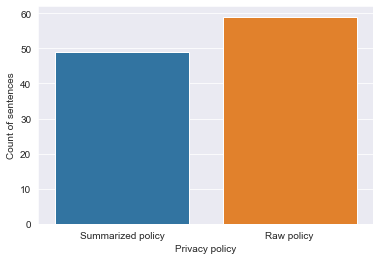

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.barplot(x=["Summarized policy","Raw policy"],y=[49,59]).set(xlabel='Privacy policy', ylabel='Count of sentences')
plt.show()

## It can be inferred that there is definitely a reduction in the number of sentences when we print sentences that contain common words that we extracted above from the other privacy policy links. Hence on applying an NLP algorithm on top of this (future work), the sentences can be further reduced in length and hence an efficient shorter summary can be obtained

# APPLYING NLP ALGORITHMS

## Getting the summarized privacy policies combined to form sentences

In [170]:
string=""
for i in summary:
    string+=i
    string+="."
print(string)

com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy. This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com. By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you acces

## Importing libraries to perform extractive summarization

In [44]:
import sumy

In [45]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

## Using the LEXRANK summarizer

In [46]:
from sumy.summarizers.lex_rank import LexRankSummarizer

In [47]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raghav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [171]:
my_parser = PlaintextParser.from_string(string,Tokenizer('english'))

In [172]:
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=15)
# Printing the summary
final_policy=""
for sentence in lexrank_summary:
    print(sentence)
    print()
    final_policy+=str(sentence)

com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy.

By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you access our service the type of computer you're using, the type of web browser you're using.We may coll

In [173]:
final_policy_list=final_policy.split(".")
final_policy_list.remove("")
print(final_policy_list)

["com India Limited and its subsidiaries and affiliates ('Rediff", "com') respects your privacy", 'By accessing the services provided by Rediff', 'com you agree to the collection and use of your data by Rediff', 'com in the manner provided in this Privacy Policy', 'We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data', "WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you access our service the type of computer you're using, the type of web browser you're

## We get 3 chunks of paragraphs and 18 sentences as output

In [174]:
print(len(final_policy_list))

43


In [175]:
count_common=0
for i in final_policy_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

245


## The common words from the list of 59 words has repeated 144 times, which proves sentence significance

## Without common words reduction and directly applying LEXRANK to the raw privacy policy

In [53]:
test_string=""
for i in test_2:
    test_string+=i
    test_string+="."
print(test_string)

Rediff.com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy. This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com. You are advised to please read the Privacy Policy carefully. By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to 

In [54]:
my_parser = PlaintextParser.from_string(test_string,Tokenizer('english'))

In [55]:
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=3)

# Printing the summary
final_policy_without_cw=""
for sentence in lexrank_summary:
    print(sentence)
    print()
    final_policy_without_cw+=str(sentence)

By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you access our service the type of computer you're using, the type of web browser you're using.We may collect the following personally identifiable information about you:name including first and last

In [56]:
final_policy_list_test2=final_policy_without_cw.split(".")
print(final_policy_list_test2)

['By accessing the services provided by Rediff', 'com you agree to the collection and use of your data by Rediff', 'com in the manner provided in this Privacy Policy', 'We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data', "WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you access our service the type of computer you're using, the type of web browser you're using", 'We may collect the following personally identifiable information about you:name includi

In [57]:
print(len(final_policy_list_test2))

19


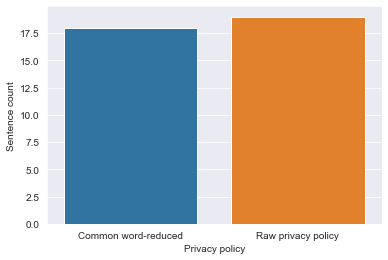

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.barplot(x=["Common word-reduced","Raw privacy policy"],y=[18,19]).set(xlabel='Privacy policy', ylabel='Sentence count')
plt.show()

## However, the chunk of lines obtained after common word sentence reduction process is different from the direct application of LEXRANK above.

## Applying another extractive method (KL Summarizer) and testing the privacy policies

In [59]:
from sumy.summarizers.kl import KLSummarizer

In [176]:
string

"com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy. This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com. By accessing the services provided by Rediff.com you agree to the collection and use of your data by Rediff.com in the manner provided in this Privacy Policy.We want you to feel comfortable using our web sites feel secure submitting information to uscontact us with your questions or concerns about privacy on this site know that by using our sites you are consenting to the collection of certain data.WHAT INFORMATION IS, OR MAY BE, COLLECTED FROM YOU?We will automatically receive and collect certain anonymous information in standard usage logs through our Web server, including computer-identification information obtained from 'cookies,' sent to your browser from a web server cookie stored on your hard drive an IP address, assigned to the computer which you use the domain server through which you acce

In [177]:
parser=PlaintextParser.from_string(string,Tokenizer('english'))

In [178]:
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=15)

count=0
policy=""
# Printing the summary
for sentence in kl_summary:
    print(sentence)
    count+=1
    policy+=str(sentence)
    print()

com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy.

This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com.

Please understand that any information that is disclosed in these areas becomes public information.

You are not required to register with us in order to use our sites.

However, we offer some services only to visitors who do register.You may change your interests at any time and may opt-in or opt-out of any marketing / promotional / newsletters mailings.com reserves the right to send you certain service-related communication, considered to be a part of your rediff account without offering you the facility to opt-out.

You may update your information and change your account settings at any time.Upon request, we will remove/block your personally identifiable information from our database, thereby canceling your registration.

See Contact information below.

However, your information may remain stor

In [179]:
print("Total chunk of lines obtained: ",count)

Total chunk of lines obtained:  15


In [180]:
policy

"com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy.This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com.Please understand that any information that is disclosed in these areas becomes public information.You are not required to register with us in order to use our sites.However, we offer some services only to visitors who do register.You may change your interests at any time and may opt-in or opt-out of any marketing / promotional / newsletters mailings.com reserves the right to send you certain service-related communication, considered to be a part of your rediff account without offering you the facility to opt-out.You may update your information and change your account settings at any time.Upon request, we will remove/block your personally identifiable information from our database, thereby canceling your registration.See Contact information below.However, your information may remain stored in archive

In [181]:
test_list=policy.split(".")
test_list

["com India Limited and its subsidiaries and affiliates ('Rediff",
 "com') respects your privacy",
 'This Privacy Policy provides succinctly the manner your data is collected and used by Rediff',
 'com',
 'Please understand that any information that is disclosed in these areas becomes public information',
 'You are not required to register with us in order to use our sites',
 'However, we offer some services only to visitors who do register',
 'You may change your interests at any time and may opt-in or opt-out of any marketing / promotional / newsletters mailings',
 'com reserves the right to send you certain service-related communication, considered to be a part of your rediff account without offering you the facility to opt-out',
 'You may update your information and change your account settings at any time',
 'Upon request, we will remove/block your personally identifiable information from our database, thereby canceling your registration',
 'See Contact information below',
 'Howev

In [182]:
count_common=0
for i in test_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

115


## The common words from the list of 59 words has repeated 106 times, which proves sentence significance

## Comparison with actual privacy policy without common words reduction

In [67]:
parser=PlaintextParser.from_string(test_string,Tokenizer('english'))

In [68]:
my_parser = PlaintextParser.from_string(test_string,Tokenizer('english'))

In [69]:
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=15)

count=0
# Printing the summary
for sentence in kl_summary:
    print(sentence)
    count+=1
    print()

Rediff.com India Limited and its subsidiaries and affiliates ('Rediff.com') respects your privacy.

This Privacy Policy provides succinctly the manner your data is collected and used by Rediff.com.

You are advised to please read the Privacy Policy carefully.

Please understand that any information that is disclosed in these areas becomes public information.

You are not required to register with us in order to use our sites.

However, we offer some services only to visitors who do register.You may change your interests at any time and may opt-in or opt-out of any marketing / promotional / newsletters mailings.

You may update your information and change your account settings at any time.Upon request, we will remove/block your personally identifiable information from our database, thereby canceling your registration.

See Contact information below.

However, your information may remain stored in archive on our servers even after the deletion or the termination of your account.If we pla

In [70]:
print("Total chunk of lines obtained: ",count)

Total chunk of lines obtained:  15


## Few more tests using the KL summarizer to see the reduction

In [71]:
policy_test="eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users are no longer anonymous to the eleB2B.com and EFY Group website admins, and it is deemed that the user has given us the right to publish the relevant personal and business details for the following purposes:To personalise your experienceTo improve our websiteTo share with sponsorsTo administer a contest, promotion, survey, or conduct any other such activity on the siteTo send out periodic emails.The email address you provide may be used to send you information, respond to inquiries, have an interactive communication, address other requests or personalise your experience on our website. Your business information is used when compiling listings or when featuring product offerings across our network, thus fetching the maximum business opportunities for the user.We also collect usage statistics (page views, unique visitors, browser software, screen resolutions, etc.) through third party tools/websites for analysis. This data helps us provide you with an improved user experience and services.Sharing of Information:As per our principles, eleB2B.com and EFY Group websites will not disclose or share any of your personal as well as business information without your permission, or under special circumstances as permitted in the terms of this policy (Privacy Policy Agreement).Distribution of Information:eleB2B.com; send its users emails regarding its products and services. It may also use your information to create any match- making tools to bring buyers together with interested sellers.Promotional use:Promotions that are being run may be sponsored by eleB2B.com only or EFY Group websites. You can decide not to participate in the promotions if you don't want your data to be shared. For the record, right now, eleB2B.com is not running any promotional campaign.Updating information:As a buyer or supplier, you may edit your account information and profile by logging into our website and/or by sending a request to the admin within the panel. The requested changes will take time to be displayed on the website because of the cross-verification process.At the same time, a registered user account can be deleted or deactivated, but doing so will only result in the user not being able to access the members-only area of the website. The rest of the information about that particular user will remain in our records.Cookie policyRight now, we are using cookies for usability purposes only. You can choose to have your computer warn you each time a cookie is being sent, or you can choose to turn off all cookies via your browser settings. Also, if you turn your cookies off, some of our services may not function properly.You can still place orders by contacting customer service +91-11-4059-6605 or can complain at support@eleb2b.com.Protection of Information:We do not sell third parties any data in bulk, which can be misused for telemarketing, bulk mailing or any other wrong purposes. Also, eleB2B does not sell any user’s’ personal information or business information until and unless it is permitted to do so by the user, as per the terms of this policy (Privacy Policy Agreement).Changes in the Privacy Policy.eleB2B.com reserves the right to change its user policies from time to time, so we suggest that you, as a buyer or seller, check the terms of the policy periodically."
policy_test

"eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, u

In [72]:
parser=PlaintextParser.from_string(policy_test,Tokenizer('english'))

In [73]:
my_parser = PlaintextParser.from_string(policy_test,Tokenizer('english'))

In [74]:
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=20)

# Printing the summary
for sentence in kl_summary:
    print(sentence)

eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy.
We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled.
As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services.
This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details.
During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, us

In [75]:
summary_test=[]
for i in range(len(policy_test_sentences)):
    for j in common_word_list:
        if j in policy_test_sentences[i]:
            summary_test.append(policy_test_sentences[i])
            break

In [76]:
string3=""
for i in summary_test:
    string3+=i
    string3+="."
print(string3)

com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users are

In [77]:
parser=PlaintextParser.from_string(string3,Tokenizer('english'))

In [78]:
my_parser = PlaintextParser.from_string(string3,Tokenizer('english'))

In [79]:
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=20)
count=0
# Printing the summary
for sentence in kl_summary:
    print(sentence)
    count+=1
    print()

com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy.

We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled.

As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services.

This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details.

During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users

In [80]:
print("Total chunk of lines obtained",count)

Total chunk of lines obtained 16


## There were a minimum of 16% reduction of sentences and a maximum of 20% reduction of sentences using the common word reduction process, and on applying extractive NLP algorithms on top of that, we get more significant sentences in a summarized form

## The results show that there is a minimum of 79.6% increase in the repetition of common words in each sentences and a maximum of 144% increase in repetition on another test conducted which proves the significant role common words play 

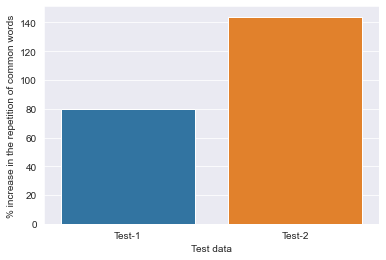

In [81]:
sns.set_style('darkgrid')
sns.barplot(x=["Test-1","Test-2"],y=[79.6,144]).set(xlabel='Test data', ylabel='% increase in the repetition of common words')
plt.show()

## On comparison of text done using common word reduction process and without the common word reduction process, we obtained a difference of 18.94% increase when the raw text with the reduction process is fed into the NLP algorithms, which indicates that it retained the important sentences better than what the raw text without the reduction process retained

## Thus, as an inference, we can see that the sentences obtained after applying the common word reduction process are more significant than by directly giving the privacy policy text in raw form

# TEST-3

In [147]:
pr_new="GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.gocoop.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully. If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website. Your use or access of the Website, shall constitute Your agreement to this Privacy Policy.By accepting the Privacy Policy you expressly consent to GoCoop Solutions and Services’ use and disclosure of your personal information in accordance with this Privacy Policy.This policy shall apply to all information You provide on the Website and all information that GoCoop Solutions and Services collects on the Website including but not limited to any information You upload, emails that You exchange with GoCoop Solutions and Services and other users of the Website and any information submitted by You to GoCoop Solutions and Services.The policy does not apply to, nor does GoCoop Solutions and Services take any responsibility for, any information that is collected by any third party either using the Website or through any links on the Website or through any advertisements on the Website.In the use of the Website, as You navigate through the Website, GoCoop Solutions and Services may collect different types of information. This may include User Information, information that is personally identifiable, other information which may not be personally identifiable, information on the usage patterns of any user including You, searches that You have done on the Website, advertisements or third party links that You have visited, any emails or other correspondence You have exchanged on the Website or with GoCoop Solutions and Services.You understand that the information collected by GoCoop Solutions and Services, may be collected directly or through tracking of Your usage of the Website. The usage details may include IP addresses, details of Your computer equipment, browser, location, connections, any information that GoCoop Solutions and Services may collect through the use of cookies and other tracking technologies. The collection of data may in most cases be automatic.'Cookies' are files that would be placed in Your system’s hard drive and are intended to improve Your User experience, by enabling GoCoop Solutions and Services to track Your usage and preference. These cookies may track Your Website usage, advertisement and links that You visit and other user data. [Most cookies GoCoop Solutions and Services uses are limited to a session, which mean they will be automatically deleted when Your session closes]. You may decline these cookies by changing Your browser settings, if permitted, however do note that this mayAdvertisements on the Website may be posted by third-party advertisers, and such third parties may use cookies and other automatic tracking technologies to collect information about You, including but not limited to web behavioural information and patterns. GoCoop Solutions and Services does not control nor takes any responsibility for such third parties, their collection and use of information or their tracking technologies or how they may be used.You also may provide information to be published or displayed or posted on the Website, or transmitted to other users of the Website or third parties. Any such information is posted or transmitted to others at your own risk. Please be aware that GoCoop Solutions and Services cannot control the actions of other users of the Website with whom you may choose to share information with.By using our website, you agree to allow third parties to process your IP address, in order to determine your location for the purpose of currency conversion. You also agree to have that currency stored in a session cookie in your browser (a temporary cookie which gets automatically removed when you close your browser). We do this in order for the selected currency to remain selected and consistent when browsing our website so that the prices can convert to your (the visitor) local currency.The information that We collect on the Website will be used for the purposes of operating the Website, facilitating Your use of the Website, facilitating the transactions between the users, studying user behaviour and for other business purposes of GoCoop Solutions and Services. The information including any User Information will be available to other registered users of the Website.Except as otherwise provided herein, no personally identifiable information will be disclosed or shared with any third party without Your express consent. For the purposes of this policy, personally identifiable information shall mean name, age, gender, bank account information, telephone numbers, location data, email addresses, payment, billing or shipping information.Please do not include any personal information, personally identifiable information or sensitive personal information unless specifically requested by GoCoop Solutions and Services as part of the registration or other applicable processes. If GoCoop Solutions and Services determines that any information You have provided or uploaded violates the terms of this Privacy Policy, GoCoop Solutions and Services has the right, in its absolute discretion, to delete or destroy such information without incurring any liability to You.GoCoop Solutions and Services will not publish, sell or rent Your personal information to third parties for their marketing purposes without Your explicit consentGoCoop Solutions and Services may also use the information for analytical purposes, including but not limited to assessing usage data, usage patterns, estimate audience sizes and other similar activities.You agree that Your personal information may be used to contact You and deliver information or targeted advertisements, administrative notices and any other communication relevant to Your use of the Website. If You do not wish to receive these communications, You can at any time change Your profile settings.The User Information You provide on the Website may be disclosed by GoCoop Solutions and Services to its agents, employees, third party advertisers, subsidiaries and affiliates, or to other third party service providers of GoCoop Solutions and Services who require the information for the purposes of operating and maintaining the Website.GoCoop Solutions and Services will comply with requests and directions of all governmental, law enforcement or regulatory authorities, which it believes in good faith to be in accordance with any applicable law. Such compliance may include providing User Information, personally identifiable information or any other information to such agency or authority. By providing any information on the Website, You consent to GoCoop Solutions and Services providing such information to any governmental, law enforcement or regulatory authorities who exercise jurisdiction over GoCoop Solutions and Services and the Website.The information that You provide, subject to disclosure in accordance with this Privacy Policy shall be maintained in a safe and secure manner. GoCoop Solutions and Services’ databases and information are stored on secure servers with appropriate firewalls owned by GoCoop Solutions and Services or by third parties.As a user of the Website, You have the responsibility to ensure data security. You should use the Website in a responsible manner. Do not share Your username or password with any person. You are solely responsible for all acts done under the username You are registered under.Given the nature of internet transactions, GoCoop Solutions and Services does not take any responsibility for the transmission of information including User Information to the Website. Any transmission of User Information on the internet is done at Your risk. GoCoop Solutions and Services does not take any responsibility for You or any third party circumventing the privacy settings or security measures contained on the Website.While GoCoop Solutions and Services will use all reasonable efforts to ensure that Your User Information and other information submitted by You is safe and secure, it offers no representation, warranties or other assurances that the security measures are adequate, safe, fool proof or impenetrable.You can change, alter of otherwise modify or update Your User Information at any time by accessing the Website using Your registered username and accessing Your User account.You may also change and/or delete any of the information You have submitted. Do note however, GoCoop Solutions and Services the rights to save any usage information and You are not entitled to seek the deletion of the same.GoCoop Solutions and Services at its sole discretion may permit or deny the change of any information, if it is believes the same is required to observe applicable laws.The Website is only intended for users who are of 18 years of age or older and otherwise competent to enter into binding contracts. If You are not of the requisite age or otherwise unable to enter into binding contracts You are not to provide any User Information or other information. If it comes to GoCoop Solutions and Services’ attention that any User Information or information pertains to an individual under the age of 18 years or otherwise not eligible to enter into binding contracts, such User Information or information will be deleted without notice to You.The aggregate liability of GoCoop Solutions and Services to You or anyone, whether in contract, tort, negligence or otherwise, howsoever arising, whether in connection with this Privacy Policy, Your access and use of the Website and its contents and functionalities shall not exceed Rs. 100/- (Indian Rupees One Hundred Only). In no event shall GoCoop Solutions and Services be liable for any loss of profits (anticipated or real), loss of business, loss of reputation, loss of data, loss of goodwill, any business interruption or any direct, indirect, special, incidental, consequential, punitive, tort or other damages, however caused, whether or not it has been advised of the possibility of such damages.This Privacy Policy is subject to change at GoCoop Solutions and Services’ sole discretion. Any changes to the Privacy Policy will be notified by a notice on the home page."
pr_new

"GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.gocoop.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully. If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website. Your use or access of the Website, shall constit

In [148]:
pr_new=pr_new.split(".")
pr_new

["GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used",
 'The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www',
 'gocoop',
 'com (“Website”)',
 'This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained',
 'Please read and understand the policy carefully',
 ' If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website',
 ' Your use or access 

In [149]:
len(pr_new)

63

In [150]:
summary=[]
for i in range(len(pr_new)):
    for j in common_word_list:
        if j in pr_new[i]:
            summary.append(pr_new[i])
            break

In [151]:
summary

["GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used",
 'The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www',
 'com (“Website”)',
 'This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained',
 'Please read and understand the policy carefully',
 ' If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website',
 ' Your use or access of the Webs

In [152]:
len(summary)

58

In [153]:
string=""
for i in summary:
    string+=i
    string+="."
print(string)

GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully. If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website. Your use or access of the Website, shall constitute Your

In [154]:
my_parser = PlaintextParser.from_string(string,Tokenizer('english'))
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=15)
# Printing the summary
final_policy=""
for sentence in lexrank_summary:
    print(sentence)
    print()
    final_policy+=str(sentence)

GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully.

Your use or access of the Website, shall constitute Your agreement to this Privacy Policy.By accepting the Privacy Policy you expressly consent to GoCoop Solutions and Services’ use and disclosure of your personal information in accordance with this Privacy Policy.This policy shall apply to all information You provide on the We

In [155]:
final_policy_list=final_policy.split(".")
final_policy_list.remove("")
print(final_policy_list)

["GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used", 'The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www', 'com (“Website”)', 'This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained', 'Please read and understand the policy carefully', 'Your use or access of the Website, shall constitute Your agreement to this Privacy Policy', 'By accepting the Privacy Policy you expressly consent to GoCoop Solutions and Services’ use and disclosure of your personal information in accordance with this Privacy Policy', 'This policy shall apply to all information 

In [156]:
count_common=0
for i in final_policy_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

272


In [159]:
string

"GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully. If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website. Your use or access of the Website, shall constitute You

In [160]:
my_parser = PlaintextParser.from_string(string,Tokenizer('english'))
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(my_parser.document,sentences_count=15)

count=0
policy=""
# Printing the summary
for sentence in kl_summary:
    print(sentence)
    count+=1
    policy+=str(sentence)
    print()

GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used.The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www.com (“Website”).This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained.Please read and understand the policy carefully.

If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website.

Your use or access of the Website, shall constitute Yo

In [161]:
final_policy_list=policy.split(".")
final_policy_list.remove("")
print(final_policy_list)

["GoCoop Solutions and Services Private Limited, an Indian company ('GoCoop Solutions and Services', 'Our' or 'We') recognizes the importance of Your privacy and is committed to ensuring that You are aware of how Your information is being used", 'The terms “You” or “Your”, shall include any individual or legal entity who accesses or uses www', 'com (“Website”)', 'This policy describes the types of information GoCoop Solutions and Services may collect from You or that You may provide in relation to the use or access of the Website and the manner in which such information is collected used, processed, disclosed and maintained', 'Please read and understand the policy carefully', 'If You do not agree with Our policies and Our practices in the way we treat Your information (“User Information” which may include Your name, nationality, date of birth, telephone number, email address, physical address and the like), Your choice is to not use the Website', 'Your use or access of the Website, sha

In [162]:
count_common=0
for i in final_policy_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

154


# TEST-2 repeat

In [117]:
pr_new="eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users are no longer anonymous to the eleB2B.com and EFY Group website admins, and it is deemed that the user has given us the right to publish the relevant personal and business details for the following purposes:To personalise your experienceTo improve our websiteTo share with sponsorsTo administer a contest, promotion, survey, or conduct any other such activity on the siteTo send out periodic emails.The email address you provide may be used to send you information, respond to inquiries, have an interactive communication, address other requests or personalise your experience on our website. Your business information is used when compiling listings or when featuring product offerings across our network, thus fetching the maximum business opportunities for the user.We also collect usage statistics (page views, unique visitors, browser software, screen resolutions, etc.) through third party tools/websites for analysis. This data helps us provide you with an improved user experience and services.Sharing of Information:As per our principles, eleB2B.com and EFY Group websites will not disclose or share any of your personal as well as business information without your permission, or under special circumstances as permitted in the terms of this policy (Privacy Policy Agreement).Distribution of Information:eleB2B.com; send its users emails regarding its products and services. It may also use your information to create any match- making tools to bring buyers together with interested sellers.Promotional use:Promotions that are being run may be sponsored by eleB2B.com only or EFY Group websites. You can decide not to participate in the promotions if you don't want your data to be shared. For the record, right now, eleB2B.com is not running any promotional campaign.Updating information:As a buyer or supplier, you may edit your account information and profile by logging into our website and/or by sending a request to the admin within the panel. The requested changes will take time to be displayed on the website because of the cross-verification process.At the same time, a registered user account can be deleted or deactivated, but doing so will only result in the user not being able to access the members-only area of the website. The rest of the information about that particular user will remain in our records.Cookie policyRight now, we are using cookies for usability purposes only. You can choose to have your computer warn you each time a cookie is being sent, or you can choose to turn off all cookies via your browser settings. Also, if you turn your cookies off, some of our services may not function properly.You can still place orders by contacting customer service +91-11-4059-6605 or can complain at support@eleb2b.com.Protection of Information:We do not sell third parties any data in bulk, which can be misused for telemarketing, bulk mailing or any other wrong purposes. Also, eleB2B does not sell any user’s’ personal information or business information until and unless it is permitted to do so by the user, as per the terms of this policy (Privacy Policy Agreement).Changes in the Privacy Policy.eleB2B.com reserves the right to change its user policies from time to time, so we suggest that you, as a buyer or seller, check the terms of the policy periodically."
pr_new

"eleB2B.com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, u

In [118]:
pr_new=pr_new.split(".")
pr_new

['eleB2B',
 "com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy",
 " We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled",
 ' As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services',
 ' This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B',
 'com',
 'By using our site, you consent to the terms of our online Privacy Policy',
 'What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details',
 ' During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details',
 'What do we use your personal/business informat

In [119]:
len(pr_new)

41

In [120]:
summary=[]
for i in range(len(pr_new)):
    for j in common_word_list:
        if j in pr_new[i]:
            summary.append(pr_new[i])
            break

In [121]:
len(summary)

35

In [122]:
string=""
for i in summary:
    string+=i
    string+="."
print(string)

com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy. We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled. As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services. This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details. During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users are

In [138]:
my_parser = PlaintextParser.from_string(string,Tokenizer('english'))
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document,sentences_count=15)
# Printing the summary
final_policy=""
for sentence in lexrank_summary:
    print(sentence)
    print()
    final_policy+=str(sentence)

com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy.

We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled.

As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services.

This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details.

During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details.What do we use your personal/business information for?On successful registration, users

In [139]:
final_policy_list=final_policy.split(".")
final_policy_list.remove("")
print(final_policy_list)

["com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy", "We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled", 'As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services', 'This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B', 'com', 'By using our site, you consent to the terms of our online Privacy Policy', 'What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details', 'During registration, we ask the buyers or suppliers for their name, email address, business information and other personal details', 'What do we use your personal/business information for?On successful r

In [140]:
count_common=0
for i in final_policy_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

201


In [141]:
my_parser = PlaintextParser.from_string(string,Tokenizer('english'))

In [142]:
kl_summarizer=KLSummarizer()
kl_summary=kl_summarizer(parser.document,sentences_count=15)

count=0
policy=""
# Printing the summary
for sentence in kl_summary:
    print(sentence)
    count+=1
    policy+=str(sentence)
    print()

com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy.

We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled.

As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services.

This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B.com.By using our site, you consent to the terms of our online Privacy Policy.What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details.

Your business information is used when compiling listings or when featuring product offerings across our network, thus fetching the maximum business opportunities for the user.We also collect usage statistics (page vie

In [145]:
final_policy_list=policy.split(".")
final_policy_list.remove("")
print(final_policy_list)

["com (a part of EFY Enterprises Pvt Ltd) is committed to safeguarding its users' privacy", "We request all users to read our 'Privacy Policy' to understand how their personal and business information will be handled", 'As of now, we do not charge a single penny to buyers and suppliers (this may change later, and we will inform you when that happens) in exchange for our services', 'This privacy policy is applicable to the entire network of suppliers/manufacturers etc listed on and using eleB2B', 'com', 'By using our site, you consent to the terms of our online Privacy Policy', 'What user information do we collect?We collect information from buyers and suppliers when they register to gain access to our services or when they are requested to provide their personal and business details', 'Your business information is used when compiling listings or when featuring product offerings across our network, thus fetching the maximum business opportunities for the user', 'We also collect usage st

In [146]:
count_common=0
for i in final_policy_list:
    for j in common_word_list:
        if j in i:
            count_common+=i.count(j)
print(count_common)

172
